# EDA

# 1- Exploring

In [95]:
# Essentials:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# K-means for Clustering
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [96]:
df = pd.read_csv("/home/elzaim/Project_ML/Scr/Database/data_train.csv")


In [97]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [98]:
# df
# df.head(5)
# df.tail(5)
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
952,C10986,1538.569369,1.000000,3852.37,2681.99,1170.38,0.000000,1.000000,0.75,0.75,0.000000,0,35,6000.0,3386.915692,393.411779,0.272727,12
8544,C18776,547.287057,1.000000,0.00,0.00,0.00,243.336548,0.000000,0.00,0.00,0.166667,2,0,2000.0,232.430161,163.411456,0.000000,12
4868,C15003,661.940291,1.000000,755.14,482.90,272.24,0.000000,0.916667,0.75,0.75,0.000000,0,29,6500.0,2284.482833,247.277952,0.333333,12
2919,C13004,54.803090,0.636364,462.32,0.00,462.32,0.000000,0.583333,0.00,0.50,0.000000,0,8,5000.0,422.709468,82.062989,0.454545,12
3076,C13165,666.314773,0.545455,0.00,0.00,0.00,1435.898249,0.000000,0.00,0.00,0.083333,1,0,1500.0,444.852002,486.647187,0.000000,12


In [99]:
df.shape

(8950, 18)

In [100]:
# Calculate mean ignoring NaN values
mean_value = df["MINIMUM_PAYMENTS"].dropna().mean()

# Fill NaN or None values with the calculated mean
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(mean_value)

# Then apply the log1p transformation
df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])
df["MINIMUM_PAYMENTS"]
# Alternative one-liner (more concise but less readable):
# df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].dropna().mean()))

0       4.945277
1       6.978531
2       6.442994
3       6.762968
4       5.504483
          ...   
8945    3.909748
8946    6.762968
8947    4.423869
8948    4.038755
8949    4.491878
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64


This approach first drops the `NaN` values before calculating the mean, which should resolve the issue.

In [101]:
# Assistant
# First, fill NaN or None values with 0 before applying log1p
# This ensures all values are numeric
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(0)

# Then apply the log1p transformation
df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])

# Alternative approach using a single line:
# df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"].fillna(0))

In [102]:
# Assistant
# Fill NaN or None values with the mean of the column before applying log1p
mean_value = df["MINIMUM_PAYMENTS"].mean()
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(mean_value)

# Then apply the log1p transformation
df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])

# Alternative approach using a single line:
# df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean()))

In [103]:
# Calculate mean ignoring NaN values
mean_value = df["MINIMUM_PAYMENTS"].dropna().mean()

# Fill NaN or None values with the calculated mean
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(mean_value)

# Then apply the log1p transformation
df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])

# Alternative one-liner (more concise but less readable):
# df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].dropna().mean()))


This approach first drops the `NaN` values before calculating the mean, which should resolve the issue.

# User
what else i want to build clustring model

# Assistant
To build a clustering model for your project, I'll outline the steps you should follow. Based on your previous code, it seems you're working with a financial dataset, possibly credit card customer data.

Here's how to build a clustering model:


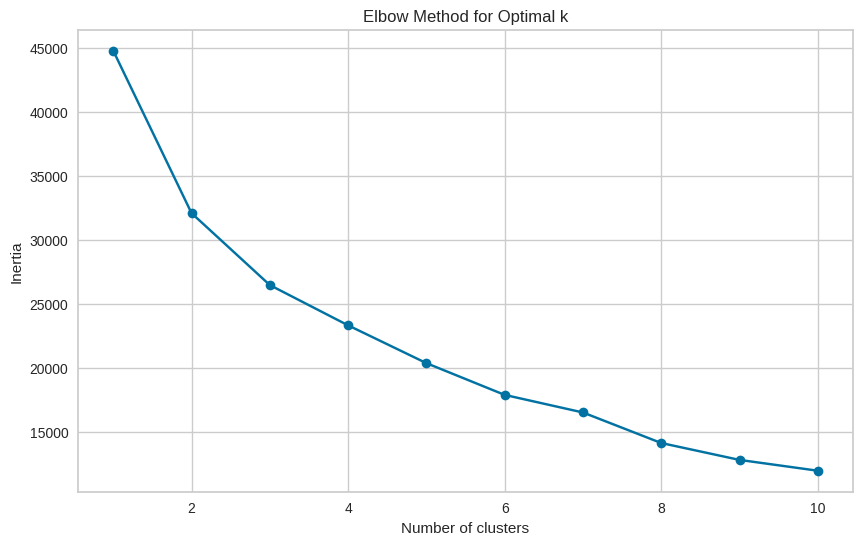

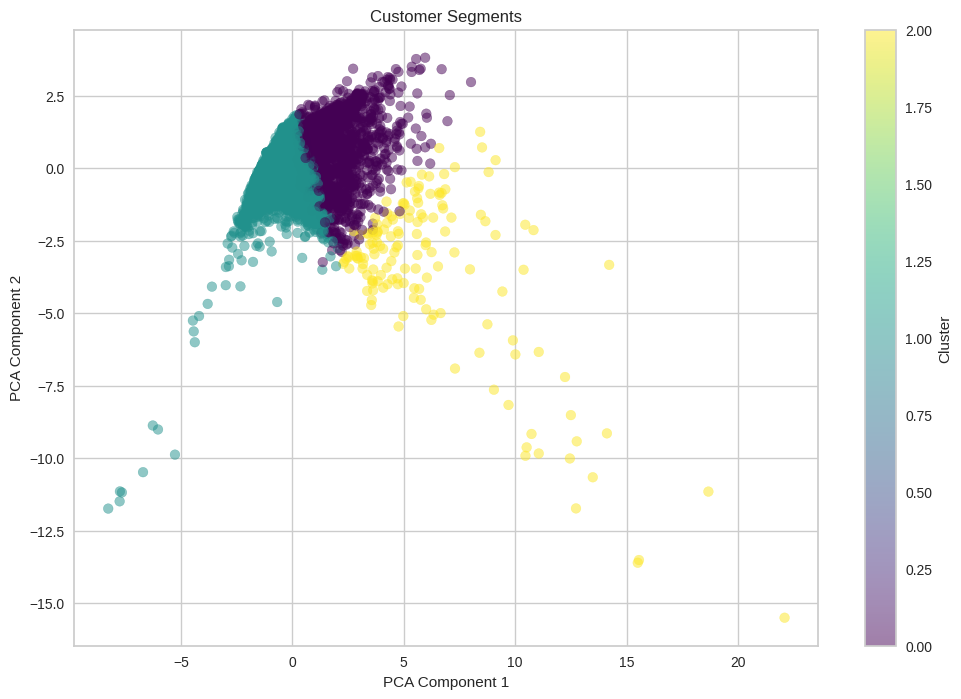

TypeError: agg function failed [how->mean,dtype->object]

In [104]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2: Prepare your data
# Select features for clustering (exclude target variables or identifiers)
features = ['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PAYMENTS']  # Adjust based on your columns
X = df[features].copy()

# Step 3: Handle missing values for all features
for col in X.columns:
    X[col] = X[col].fillna(X[col].dropna().mean())

# Step 4: Scale the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Step 6: Build the final clustering model with the optimal k
# Let's assume k=3 based on the elbow method (adjust as needed)
optimal_k = 3  # Change this based on your elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Step 7: Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 8: Analyze the clusters
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 9: Profile the clusters
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Step 10: Evaluate clustering performance
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


You can adjust this code based on your specific needs:

1. Update the `features` list with the relevant columns from your dataset
2. Adjust the optimal number of clusters (`optimal_k`) based on the elbow plot
3. Consider adding more evaluation metrics or visualization techniques

Would you like me to explain any specific part of this clustering process in more detail?

In [105]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [107]:
df.describe(include ="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,0.727317,0.153715,11.517318,0.802458
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,0.035316,0.292499,1.338331,0.438502
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.018458,0.000000,6.000000,0.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,0.710636,0.000000,12.000000,1.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,0.728265,0.000000,12.000000,1.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,0.749023,0.142857,12.000000,1.000000


In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
Cluster                                3
dtype: int64

In [110]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

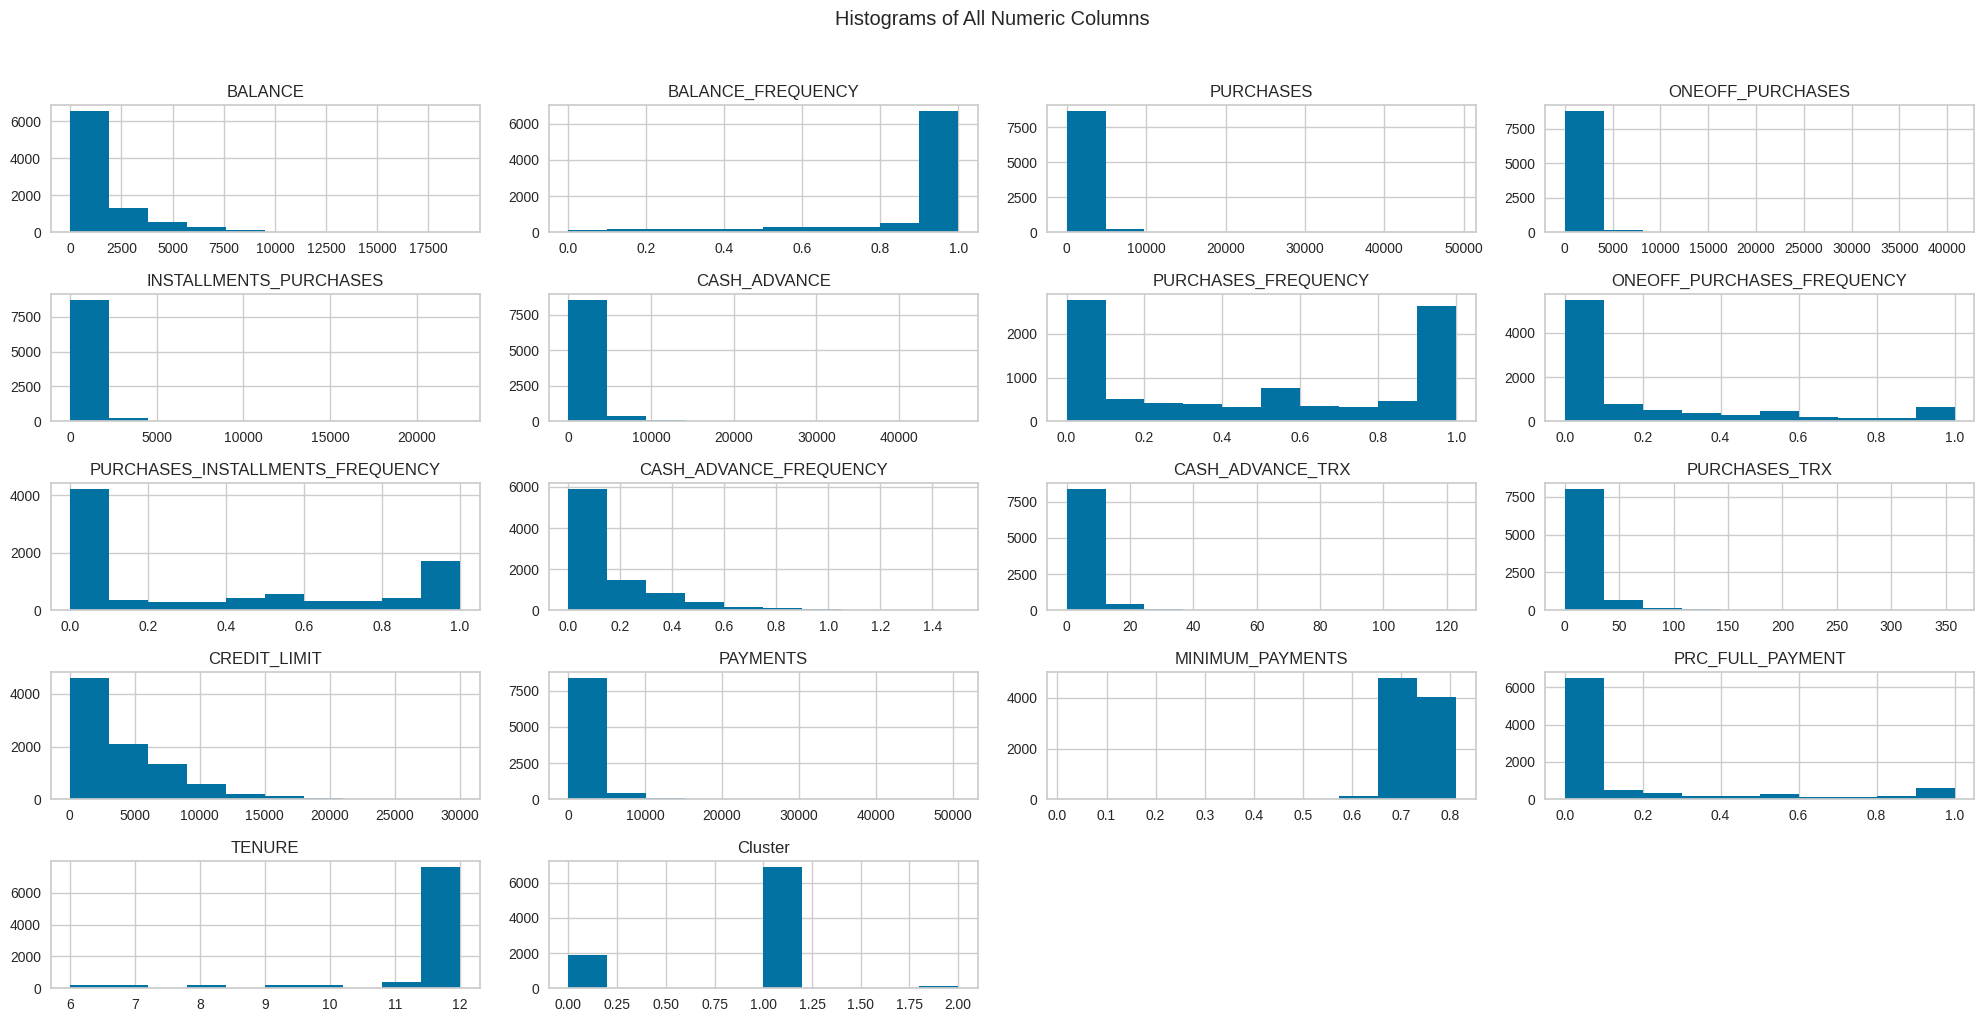

In [111]:
# To plot Histograms for all columns:
df.hist(figsize=(20, 10))
plt.suptitle('Histograms of All Numeric Columns', y=1.02)
plt.tight_layout() # Prevents labels from overlapping
plt.show()

all_columns_boxplot.png


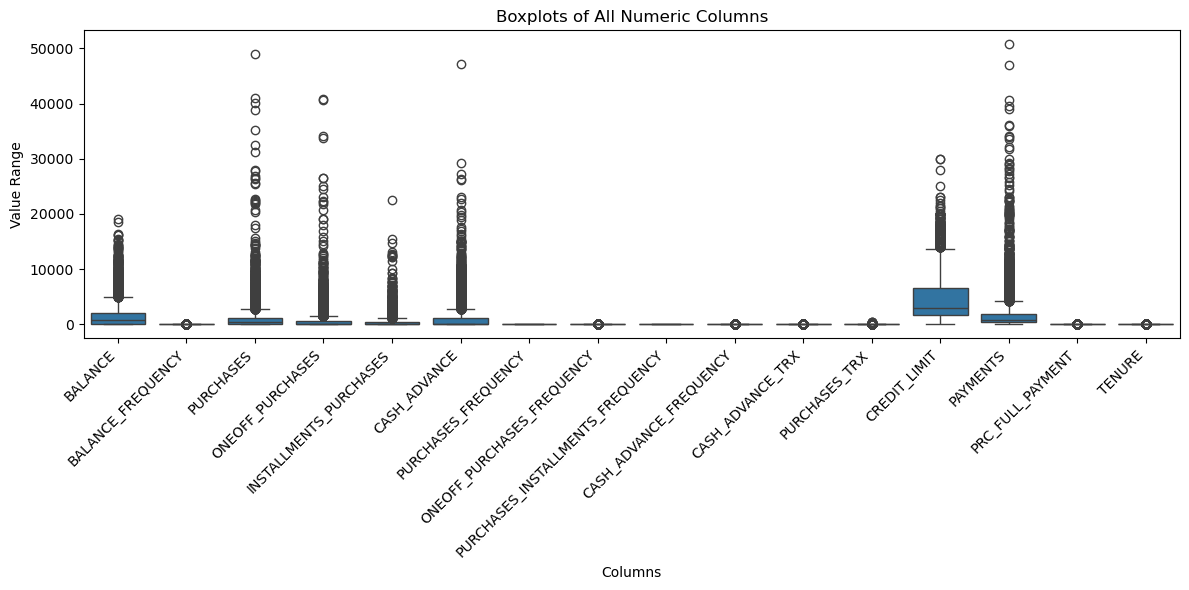

In [37]:
df_numeric = df.select_dtypes(include=['number'])

# 2. Reshape the DataFrame using melt (from wide to long format)
# This is necessary for seaborn to plot multiple columns easily
df_melted = df.melt(var_name='Variable', value_name='Value')

# 3. Plot the melted data using seaborn.boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)

# 4. Add customization
plt.title('Boxplots of All Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Value Range')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjusts layout to prevent labels from being cut off
plt.savefig('all_columns_boxplot.png')
print("all_columns_boxplot.png")

# 2 - Cleaning

In [18]:
# CUST_ID
df = df.drop('CUST_ID', axis=1)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [14]:
# MINIMUM_PAYMENTS
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

/tmp/ipykernel_4518/1881062432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

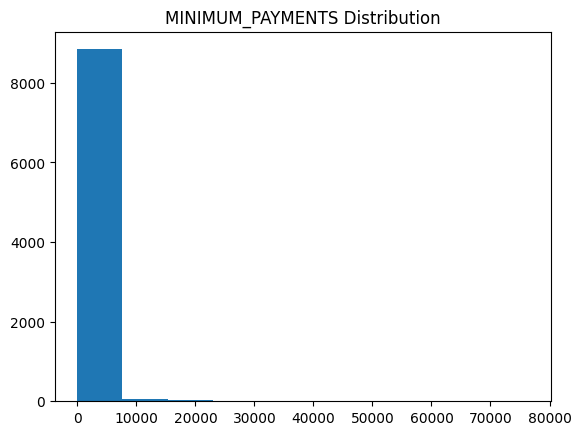

In [125]:
plt.hist(df["MINIMUM_PAYMENTS"])
plt.title("MINIMUM_PAYMENTS Distribution")
plt.show()


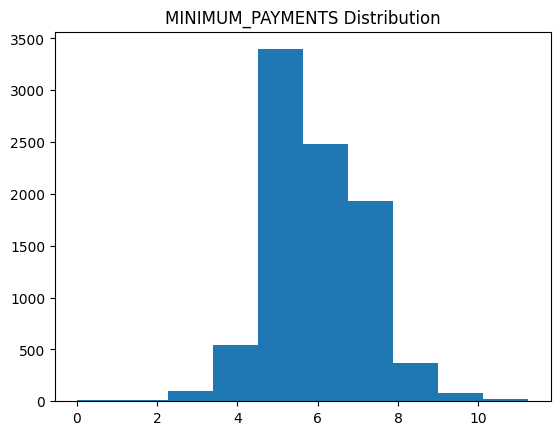

In [127]:
plt.hist(df["MINIMUM_PAYMENTS"])
plt.title("MINIMUM_PAYMENTS Distribution")
plt.show()


In [89]:
# CREDIT_LIMIT
df = df.dropna()


In [91]:
df.shape

(8636, 18)

In [90]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

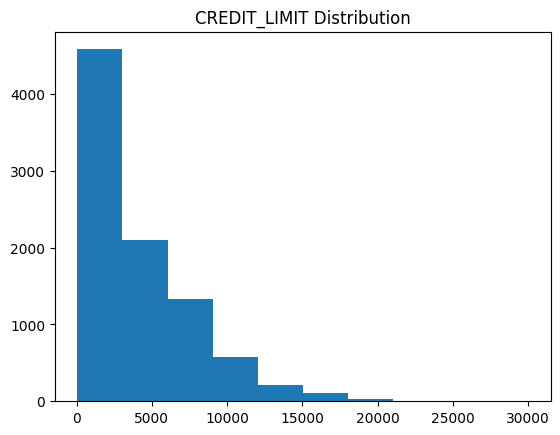

In [130]:
plt.hist(df["CREDIT_LIMIT"])
plt.title("CREDIT_LIMIT Distribution")
plt.show()


In [27]:

df["MINIMUM_PAYMENTS"] = np.log1p(df["MINIMUM_PAYMENTS"])


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable log1p method

In [131]:

df["CREDIT_LIMIT"] = np.log1p(df["CREDIT_LIMIT"])


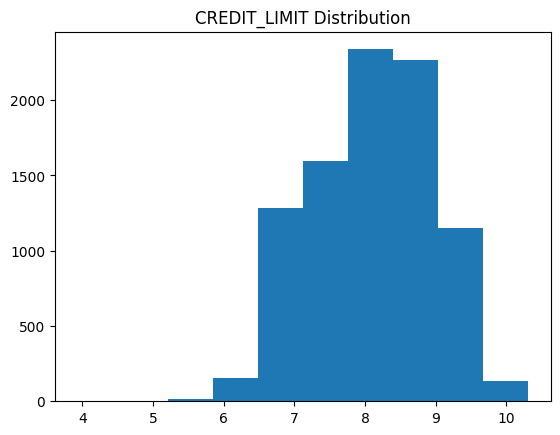

In [132]:
plt.hist(df["CREDIT_LIMIT"])
plt.title("CREDIT_LIMIT Distribution")
plt.show()


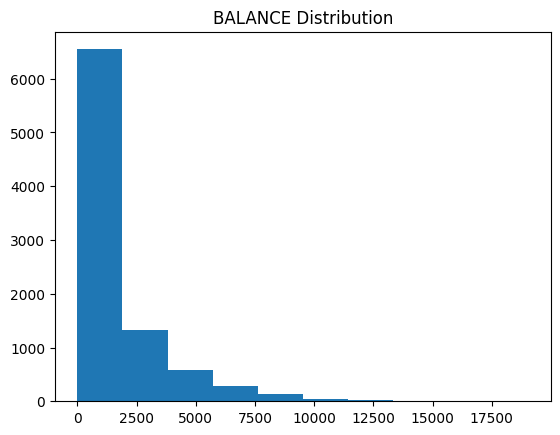

In [133]:
# BALANCE                           
plt.hist(df["BALANCE"])
plt.title("BALANCE Distribution")
plt.show()


In [134]:

df["BALANCE"] = np.log1p(df["BALANCE"])

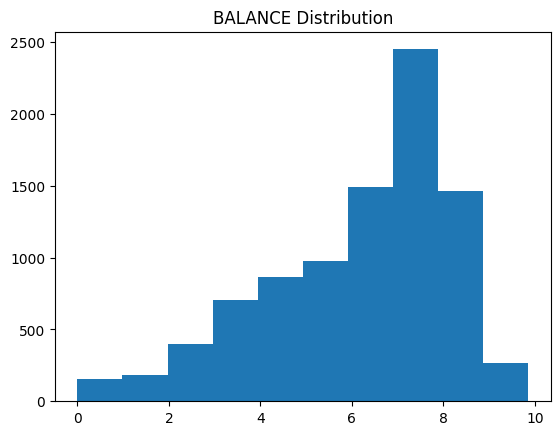

In [135]:
plt.hist(df["BALANCE"])
plt.title("BALANCE Distribution")
plt.show()

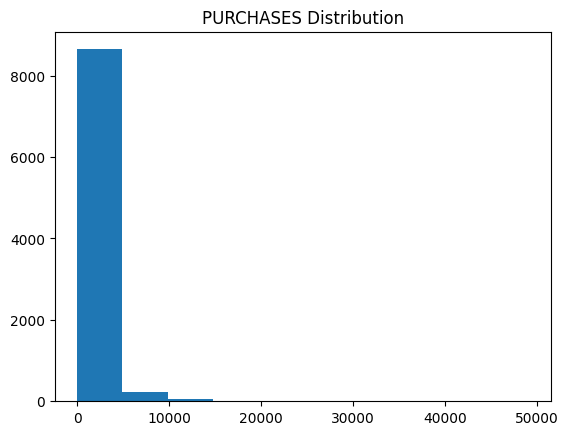

In [140]:
# PURCHASES
plt.hist(df["PURCHASES"])
plt.title("PURCHASES Distribution")
plt.show()

In [81]:
df["PURCHASES"] = np.log1p(df["PURCHASES"])

In [83]:
df["PURCHASES"]

0       4.568506
1       0.000000
2       6.651791
3       7.313220
4       2.833213
          ...   
8945    5.677165
8946    5.707110
8947    4.979489
8948    0.000000
8949    6.997824
Name: PURCHASES, Length: 8950, dtype: float64

<Axes: ylabel='PURCHASES'>

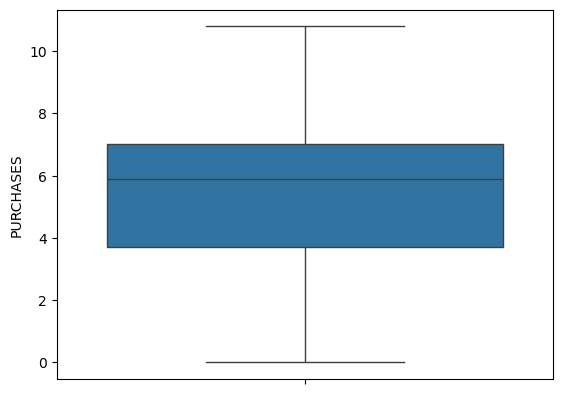

In [84]:
sns.boxplot(df["PURCHASES"])

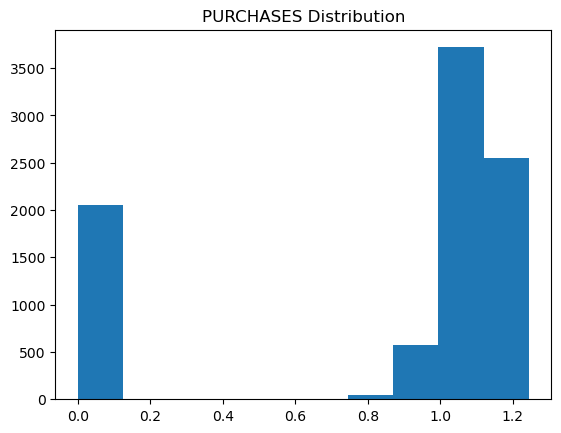

In [74]:
plt.hist(df["PURCHASES"])
plt.title("PURCHASES Distribution")
plt.show()

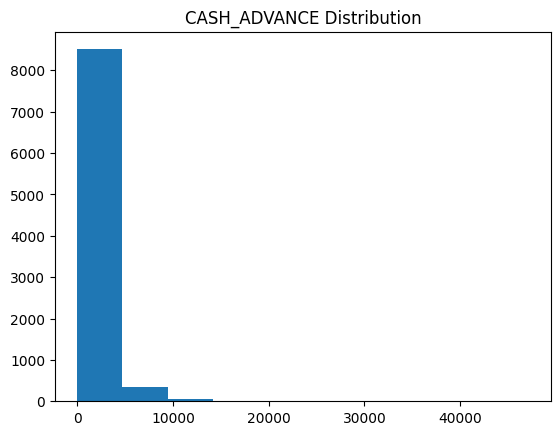

In [147]:
# CASH_ADVANCE
plt.hist(df["CASH_ADVANCE"])
plt.title("CASH_ADVANCE Distribution")
plt.show()

In [148]:
df["CASH_ADVANCE"] = np.log1p(df["CASH_ADVANCE"])

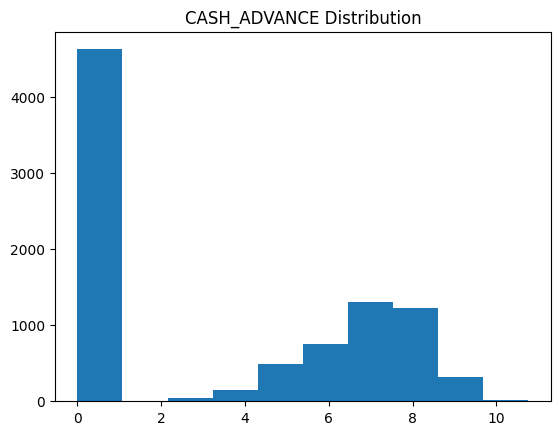

In [149]:
plt.hist(df["CASH_ADVANCE"])
plt.title("CASH_ADVANCE Distribution")
plt.show()

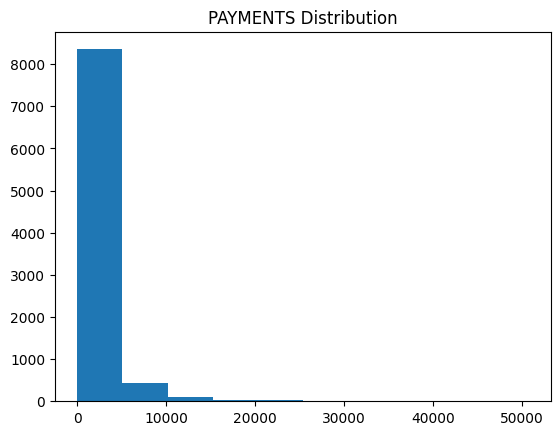

In [150]:
# PAYMENTS
plt.hist(df["PAYMENTS"])
plt.title("PAYMENTS Distribution")
plt.show()

In [65]:
df["PAYMENTS"] = np.log1p(df["PAYMENTS"])

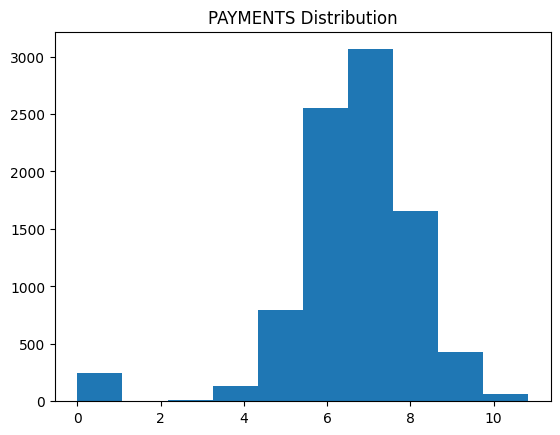

In [152]:
plt.hist(df["PAYMENTS"])
plt.title("PAYMENTS Distribution")
plt.show()

In [153]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3593,7.480611,0.693147,6.354613,4.990433,428.14,7.749102,0.833333,0.166667,0.750000,0.916667,34,15,8.922792,7.887877,1.946751,0.000000,12
6477,7.040872,0.693147,4.392843,0.000000,79.87,6.713332,0.166667,0.000000,0.166667,0.583333,16,2,7.090910,6.128956,1.994262,0.000000,12
3037,7.111475,0.693147,0.000000,0.000000,0.00,5.681488,0.000000,0.000000,0.000000,0.083333,1,0,7.244942,5.861011,1.993388,0.000000,12
6632,4.068873,0.693147,6.668177,5.952828,402.12,0.000000,1.000000,1.000000,1.000000,0.000000,0,27,8.160804,6.530665,1.809407,1.000000,12
6305,7.600562,0.693147,8.594458,8.454279,706.52,0.000000,1.000000,0.916667,0.833333,0.000000,0,61,8.832150,8.119968,1.983693,0.090909,12
5795,6.643127,0.693147,6.685761,0.000000,799.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,24,8.556606,7.209649,1.876045,0.000000,12
5059,8.320730,0.693147,5.637322,5.637322,0.00,9.141876,0.250000,0.250000,0.000000,0.416667,8,3,8.517393,9.062882,2.091911,0.166667,12
3616,3.741076,0.693147,5.481597,5.481597,0.00,0.000000,0.583333,0.583333,0.000000,0.000000,0,7,8.699681,5.738938,1.794587,0.083333,12
1197,6.821087,0.646627,7.619842,7.370382,450.00,0.000000,0.833333,0.583333,0.666667,0.000000,0,22,8.160804,6.021452,1.901616,0.125000,12
2386,4.846465,0.646627,5.907213,0.000000,366.68,5.172096,0.333333,0.000000,0.333333,0.166667,2,4,8.006701,6.522728,1.766378,0.181818,12


# 3- Data Analysis